In [6]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# SQLite veritabanı bağlantısı oluştur
conn = sqlite3.connect('okul_analizi.db')

# Sınıflar tablosunu oluştur
conn.execute('''
    CREATE TABLE IF NOT EXISTS Siniflar (
        sinif_id INTEGER PRIMARY KEY,
        sinif_adi TEXT NOT NULL
    )
''')

# Öğrenciler tablosunu oluştur
conn.execute('''
    CREATE TABLE IF NOT EXISTS Ogrenciler (
        ogrenci_id INTEGER PRIMARY KEY,
        sinif_id INTEGER NOT NULL,
        ogrenci_adi TEXT NOT NULL,
        FOREIGN KEY (sinif_id) REFERENCES Siniflar (sinif_id)
    )
''')

# DersNotlari tablosunu oluştur
conn.execute('''
    CREATE TABLE IF NOT EXISTS DersNotlari (
        not_id INTEGER PRIMARY KEY,
        ogrenci_id INTEGER NOT NULL,
        ders_adi TEXT NOT NULL,
        not_degeri INTEGER NOT NULL,
        FOREIGN KEY (ogrenci_id) REFERENCES Ogrenciler (ogrenci_id)
    )
''')

# Sınıfları ekle
siniflar = ['A', 'B', 'C', 'D']
for sinif_adi in siniflar:
    conn.execute('INSERT INTO Siniflar (sinif_adi) VALUES (?)', (sinif_adi,))

# Belirli bir öğrenci ve ders notu verisi ekleyin
ogrenci_adi = "Öğrenci-1"
ders_adi = 'Matematik'
not_degeri = 80

# Sınıfı al
sinif_adi = 'A'
sinif_id = conn.execute('SELECT sinif_id FROM Siniflar WHERE sinif_adi = ?', (sinif_adi,)).fetchone()[0]

# Öğrenciyi ekle
conn.execute('INSERT INTO Ogrenciler (sinif_id, ogrenci_adi) VALUES (?, ?)', (sinif_id, ogrenci_adi))

# Eklenen öğrencinin ID'sini al
ogrenci_id = conn.execute('SELECT ogrenci_id FROM Ogrenciler WHERE ogrenci_adi = ?', (ogrenci_adi,)).fetchone()[0]

# Ders notunu ekleyin
conn.execute('INSERT INTO DersNotlari (ogrenci_id, ders_adi, not_degeri) VALUES (?, ?, ?)',
             (ogrenci_id, ders_adi, not_degeri))

# Veritabanındaki değişiklikleri kaydet
conn.commit()

# Veriyi çek
sorgu = '''
    SELECT
        Siniflar.sinif_adi,
        Ogrenciler.ogrenci_adi,
        DersNotlari.ders_adi,
        DersNotlari.not_degeri
    FROM
        DersNotlari
        JOIN Ogrenciler ON DersNotlari.ogrenci_id = Ogrenciler.ogrenci_id
        JOIN Siniflar ON Ogrenciler.sinif_id = Siniflar.sinif_id
'''

# Sonuçları bir veri çerçevesine yükle
veri_cercevesi = pd.read_sql_query(sorgu, conn)

# Veriyi ekrana yazdır
print(veri_cercevesi)

# Veritabanı bağlantısını kapat
conn.close()


    sinif_adi ogrenci_adi   ders_adi  not_degeri
0           A   Ogrenci-1  Matematik          50
1           A   Ogrenci-1   Geometri          80
2           A   Ogrenci-1      Fizik          71
3           A   Ogrenci-1      Kimya          96
4           A   Ogrenci-1      Fizik          88
..        ...         ...        ...         ...
361         A   Öğrenci-1  Matematik          80
362         A   Öğrenci-1  Matematik          80
363         A   Öğrenci-1  Matematik          80
364         A   Öğrenci-1  Matematik          80
365         A   Öğrenci-1  Matematik          80

[366 rows x 4 columns]


In [7]:


# SQLite veritabanı bağlantısı oluştur
conn = sqlite3.connect('okul_analizi.db')

# Veriyi çek
sorgu = '''
    SELECT
        Siniflar.sinif_adi,
        DersNotlari.not_degeri
    FROM
        DersNotlari
        JOIN Ogrenciler ON DersNotlari.ogrenci_id = Ogrenciler.ogrenci_id
        JOIN Siniflar ON Ogrenciler.sinif_id = Siniflar.sinif_id
'''

# Sonuçları bir veri çerçevesine yükle
veri_cercevesi = pd.read_sql_query(sorgu, conn)

# Her sınıfın toplam notunu ve öğrenci sayısını hesapla
siniflarin_toplam_notlari = veri_cercevesi.groupby('sinif_adi')['not_degeri'].sum()
siniflarin_ogrenci_sayisi = veri_cercevesi.groupby('sinif_adi')['not_degeri'].count()

# Her sınıfın not ortalamasını hesapla
siniflarin_ortalama_notlari = siniflarin_toplam_notlari / siniflarin_ogrenci_sayisi

# En başarılı sınıfı bul
en_basarili_sinif = siniflarin_ortalama_notlari.idxmax()
en_basarili_sinif_ortalamasi = siniflarin_ortalama_notlari.max()

print(f"En başarılı sınıf: {en_basarili_sinif}, Ortalama Not: {en_basarili_sinif_ortalamasi:.2f}")

# Veritabanı bağlantısını kapat
conn.close()


En başarılı sınıf: D, Ortalama Not: 75.83


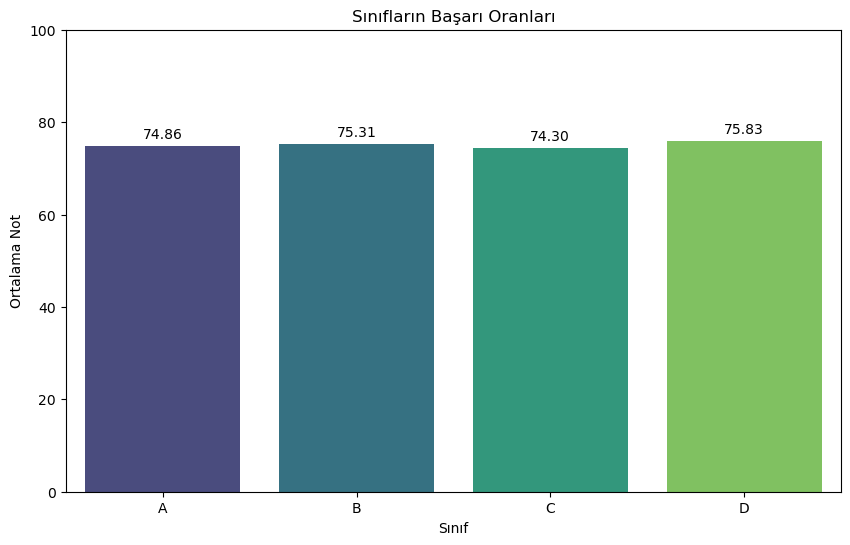

In [8]:


# SQLite veritabanı bağlantısı oluştur
conn = sqlite3.connect('okul_analizi.db')

# Veriyi çek
sorgu = '''
    SELECT
        Siniflar.sinif_adi,
        DersNotlari.not_degeri
    FROM
        DersNotlari
        JOIN Ogrenciler ON DersNotlari.ogrenci_id = Ogrenciler.ogrenci_id
        JOIN Siniflar ON Ogrenciler.sinif_id = Siniflar.sinif_id
'''

# Sonuçları bir veri çerçevesine yükle
veri_cercevesi = pd.read_sql_query(sorgu, conn)

# Her sınıfın toplam notunu ve öğrenci sayısını hesapla
siniflarin_toplam_notlari = veri_cercevesi.groupby('sinif_adi')['not_degeri'].sum()
siniflarin_ogrenci_sayisi = veri_cercevesi.groupby('sinif_adi')['not_degeri'].count()

# Her sınıfın not ortalamasını hesapla
siniflarin_ortalama_notlari = siniflarin_toplam_notlari / siniflarin_ogrenci_sayisi

# Grafiği oluştur
plt.figure(figsize=(10, 6))
sns.barplot(x=siniflarin_ortalama_notlari.index, y=siniflarin_ortalama_notlari.values, palette='viridis')
plt.title('Sınıfların Başarı Oranları')
plt.xlabel('Sınıf')
plt.ylabel('Ortalama Not')
plt.ylim(0, 100)

# Her sınıfın başarı oranını üzerine yaz
for i, v in enumerate(siniflarin_ortalama_notlari.values):
    plt.text(i, v + 1, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Grafiği göster
plt.show()

# Veritabanı bağlantısını kapat
conn.close()


A sınıfında Matematik dersindeki not ortalaması: 78.38


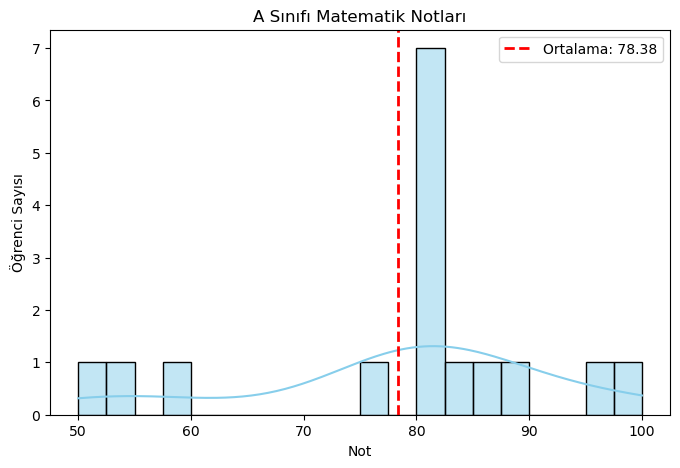

In [9]:


# SQLite veritabanı bağlantısı oluştur
conn = sqlite3.connect('okul_analizi.db')

# Veriyi çek (Sadece A sınıfı ve Matematik dersi)
sorgu = '''
    SELECT
        Ogrenciler.ogrenci_adi,
        DersNotlari.not_degeri
    FROM
        DersNotlari
        JOIN Ogrenciler ON DersNotlari.ogrenci_id = Ogrenciler.ogrenci_id
        JOIN Siniflar ON Ogrenciler.sinif_id = Siniflar.sinif_id
    WHERE
        Siniflar.sinif_adi = 'A' AND DersNotlari.ders_adi = 'Matematik'
'''

# Sonuçları bir veri çerçevesine yükle
veri_cercevesi = pd.read_sql_query(sorgu, conn)

# A sınıfındaki Matematik not ortalamasını hesapla
matematik_ortalama = veri_cercevesi['not_degeri'].mean()

print(f'A sınıfında Matematik dersindeki not ortalaması: {matematik_ortalama:.2f}')

# Grafiği oluştur
plt.figure(figsize=(8, 5))
sns.histplot(veri_cercevesi['not_degeri'], bins=20, kde=True, color='skyblue')
plt.title('A Sınıfı Matematik Notları')
plt.xlabel('Not')
plt.ylabel('Öğrenci Sayısı')
plt.axvline(matematik_ortalama, color='red', linestyle='dashed', linewidth=2, label=f'Ortalama: {matematik_ortalama:.2f}')
plt.legend()

# Grafiği göster
plt.show()

# Veritabanı bağlantısını kapat
conn.close()


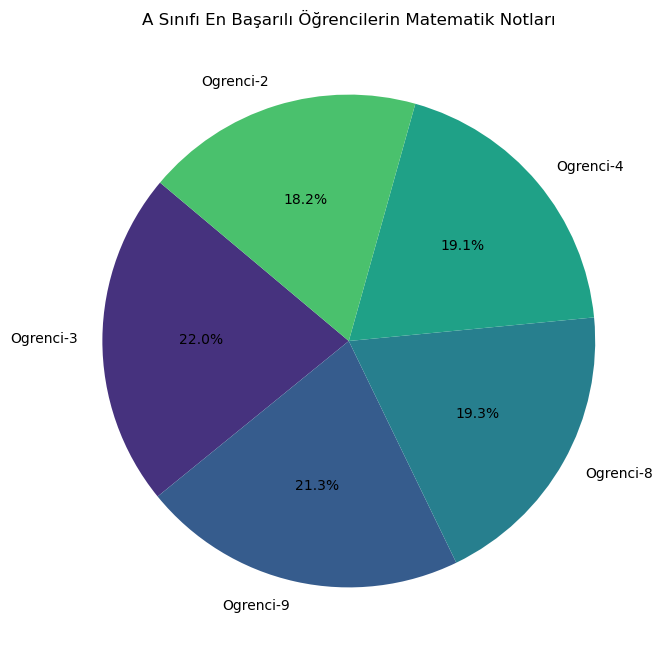

In [10]:


# SQLite veritabanı bağlantısı oluştur
conn = sqlite3.connect('okul_analizi.db')

# Veriyi çek (Sadece A sınıfı ve Matematik dersi)
sorgu = '''
    SELECT
        Ogrenciler.ogrenci_adi,
        DersNotlari.not_degeri
    FROM
        DersNotlari
        JOIN Ogrenciler ON DersNotlari.ogrenci_id = Ogrenciler.ogrenci_id
        JOIN Siniflar ON Ogrenciler.sinif_id = Siniflar.sinif_id
    WHERE
        Siniflar.sinif_adi = 'A' AND DersNotlari.ders_adi = 'Matematik'
'''

# Sonuçları bir veri çerçevesine yükle
veri_cercevesi = pd.read_sql_query(sorgu, conn)

# En başarılı öğrencileri seç
en_basarili_ogrenciler = veri_cercevesi.nlargest(5, 'not_degeri')

# Çembersel grafik oluştur
plt.figure(figsize=(8, 8))
plt.pie(en_basarili_ogrenciler['not_degeri'], labels=en_basarili_ogrenciler['ogrenci_adi'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))

# Grafik başlığı ekle
plt.title('A Sınıfı En Başarılı Öğrencilerin Matematik Notları')

# Grafik göster
plt.show()

# Veritabanı bağlantısını kapat
conn.close()


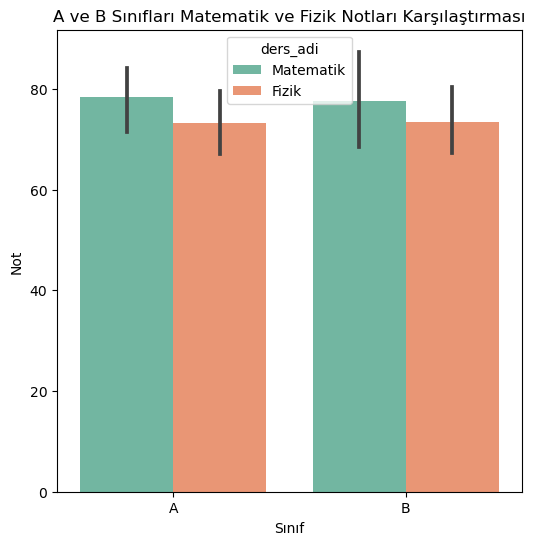

In [11]:


# SQLite veritabanı bağlantısı oluştur
conn = sqlite3.connect('okul_analizi.db')

# Veriyi çek (A ve B sınıfları, Matematik ve Fizik dersleri)
sorgu = '''
    SELECT
        Siniflar.sinif_adi,
        DersNotlari.ders_adi,
        DersNotlari.not_degeri
    FROM
        DersNotlari
        JOIN Ogrenciler ON DersNotlari.ogrenci_id = Ogrenciler.ogrenci_id
        JOIN Siniflar ON Ogrenciler.sinif_id = Siniflar.sinif_id
    WHERE
        Siniflar.sinif_adi IN ('A', 'B') AND DersNotlari.ders_adi IN ('Matematik', 'Fizik')
'''

# Sonuçları bir veri çerçevesine yükle
veri_cercevesi = pd.read_sql_query(sorgu, conn)

# Grafiği oluştur
plt.figure(figsize=(6, 6))
sns.barplot(x='sinif_adi', y='not_degeri', hue='ders_adi', data=veri_cercevesi, palette='Set2')
plt.title('A ve B Sınıfları Matematik ve Fizik Notları Karşılaştırması')
plt.xlabel('Sınıf')
plt.ylabel('Not')

# Grafik göster
plt.show()

# Veritabanı bağlantısını kapat
conn.close()


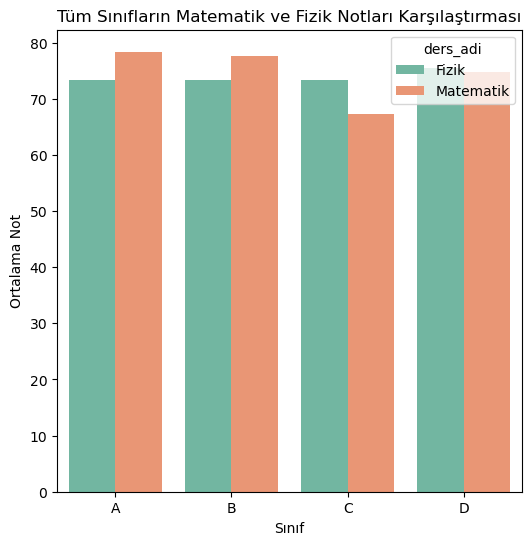

In [12]:

# SQLite veritabanı bağlantısı oluştur
conn = sqlite3.connect('okul_analizi.db')

# Veriyi çek (Tüm sınıflar, Matematik ve Fizik dersleri)
sorgu = '''
    SELECT
        Siniflar.sinif_adi,
        DersNotlari.ders_adi,
        AVG(DersNotlari.not_degeri) AS ortalama_not
    FROM
        DersNotlari
        JOIN Ogrenciler ON DersNotlari.ogrenci_id = Ogrenciler.ogrenci_id
        JOIN Siniflar ON Ogrenciler.sinif_id = Siniflar.sinif_id
    WHERE
        DersNotlari.ders_adi IN ('Matematik', 'Fizik')
    GROUP BY
        Siniflar.sinif_adi, DersNotlari.ders_adi
'''

# Sonuçları bir veri çerçevesine yükle
veri_cercevesi = pd.read_sql_query(sorgu, conn)

# Grafiği oluştur
plt.figure(figsize=(6, 6))
sns.barplot(x='sinif_adi', y='ortalama_not', hue='ders_adi', data=veri_cercevesi, palette='Set2')
plt.title('Tüm Sınıfların Matematik ve Fizik Notları Karşılaştırması')
plt.xlabel('Sınıf')
plt.ylabel('Ortalama Not')

# Grafik göster
plt.show()

# Veritabanı bağlantısını kapat
conn.close()


In [13]:


# SQLite veritabanı bağlantısı oluştur
conn = sqlite3.connect('okul_analizi.db')

# SQL sorgusu
sorgu = '''
    SELECT ogrenci_id, ogrenci_adi
    FROM Ogrenciler
    WHERE sinif_id = (SELECT sinif_id FROM Siniflar WHERE sinif_adi = 'A');
'''

# Sorguyu çalıştır ve sonuçları al
sonuclar = conn.execute(sorgu).fetchall()

# Sonuçları ekrana yazdır
for ogrenci in sonuclar:
    print(f"Öğrenci ID: {ogrenci[0]}, Adı: {ogrenci[1]}")

# Veritabanı bağlantısını kapat
conn.close()


Öğrenci ID: 1, Adı: Ogrenci-1
Öğrenci ID: 2, Adı: Ogrenci-2
Öğrenci ID: 3, Adı: Ogrenci-3
Öğrenci ID: 4, Adı: Ogrenci-4
Öğrenci ID: 5, Adı: Ogrenci-5
Öğrenci ID: 6, Adı: Ogrenci-6
Öğrenci ID: 7, Adı: Ogrenci-7
Öğrenci ID: 8, Adı: Ogrenci-8
Öğrenci ID: 9, Adı: Ogrenci-9
Öğrenci ID: 10, Adı: Ogrenci-10
Öğrenci ID: 41, Adı: Öğrenci-1
Öğrenci ID: 42, Adı: Öğrenci-1
Öğrenci ID: 43, Adı: Öğrenci-1
Öğrenci ID: 44, Adı: Öğrenci-1
Öğrenci ID: 45, Adı: Öğrenci-1
Öğrenci ID: 46, Adı: Öğrenci-1


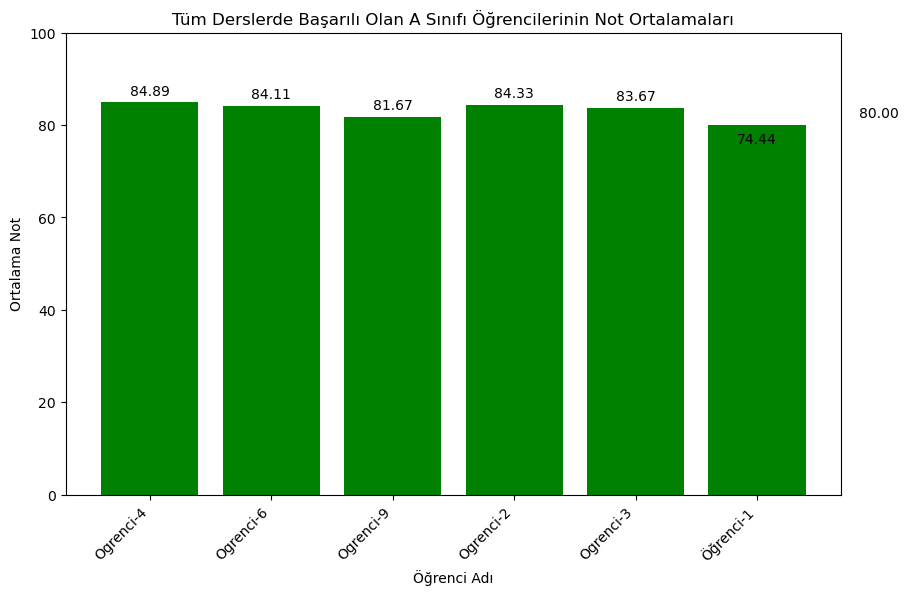

In [14]:


# SQLite veritabanı bağlantısı oluştur
conn = sqlite3.connect('okul_analizi.db')

# Tüm derslerde başarılı olan öğrencileri bul
sorgu = '''
    SELECT
        Ogrenciler.ogrenci_id,
        Ogrenciler.ogrenci_adi,
        AVG(DersNotlari.not_degeri) AS ortalama_not
    FROM
        DersNotlari
        JOIN Ogrenciler ON DersNotlari.ogrenci_id = Ogrenciler.ogrenci_id
    GROUP BY
        Ogrenciler.ogrenci_id, Ogrenciler.ogrenci_adi
    HAVING
        MIN(DersNotlari.not_degeri) >= 60;  -- Başarı notu örneğin 60
'''

# Sonuçları bir veri çerçevesine yükle
veri_cercevesi = pd.read_sql_query(sorgu, conn)

# Grafiği oluştur
plt.figure(figsize=(10, 6))
plt.bar(veri_cercevesi['ogrenci_adi'], veri_cercevesi['ortalama_not'], color='green')
plt.title('Tüm Derslerde Başarılı Olan A Sınıfı Öğrencilerinin Not Ortalamaları')
plt.xlabel('Öğrenci Adı')
plt.ylabel('Ortalama Not')
plt.ylim(0, 100)

# Notları grafiğe ekleyerek daha anlaşılır hale getir
for i, v in enumerate(veri_cercevesi['ortalama_not']):
    plt.text(i, v + 1, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Grafiği göster
plt.xticks(rotation=45, ha='right')
plt.show()

# Veritabanı bağlantısını kapat
conn.close()


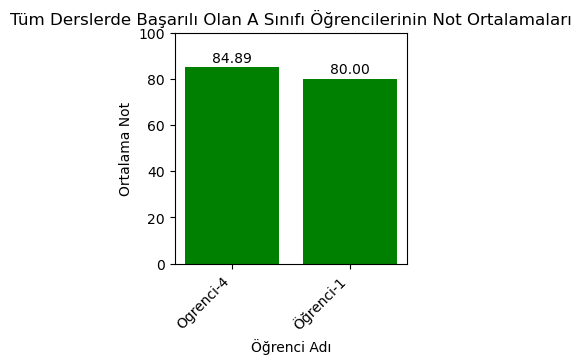

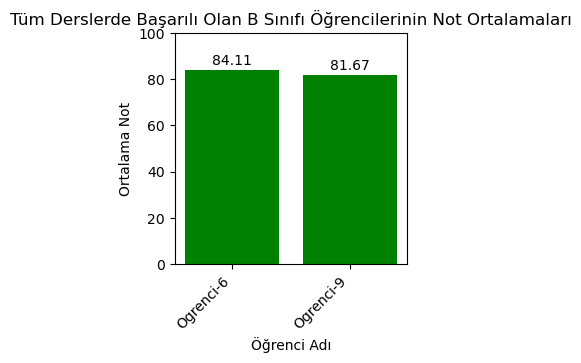

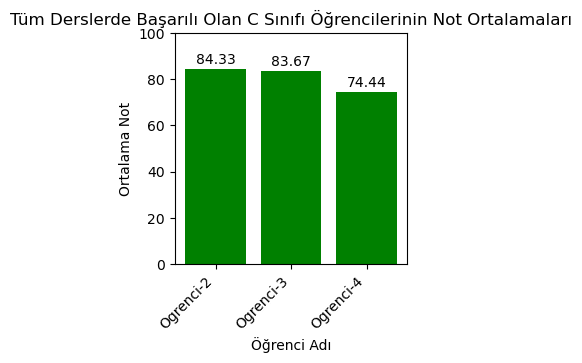

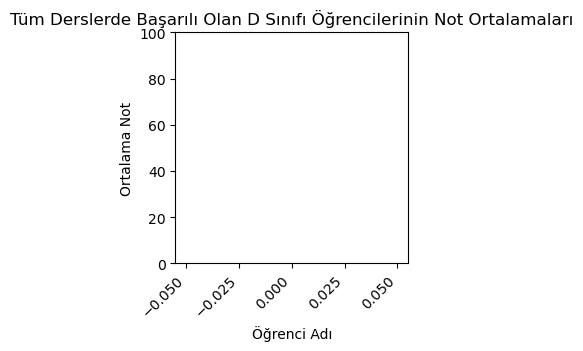

In [15]:


# SQLite veritabanı bağlantısı oluştur
conn = sqlite3.connect('okul_analizi.db')

# Sınıfları belirle
siniflar = ['A', 'B', 'C', 'D']

# Her sınıf için başarılı öğrencileri bul
for sinif in siniflar:
    sorgu = f'''
        SELECT
            Ogrenciler.ogrenci_id,
            Ogrenciler.ogrenci_adi,
            AVG(DersNotlari.not_degeri) AS ortalama_not
        FROM
            DersNotlari
            JOIN Ogrenciler ON DersNotlari.ogrenci_id = Ogrenciler.ogrenci_id
            JOIN Siniflar ON Ogrenciler.sinif_id = Siniflar.sinif_id
        WHERE
            Siniflar.sinif_adi = '{sinif}'
        GROUP BY
            Ogrenciler.ogrenci_id, Ogrenciler.ogrenci_adi
        HAVING
            MIN(DersNotlari.not_degeri) >= 60;  -- Başarı notu örneğin 60
    '''

    # Sonuçları bir veri çerçevesine yükle
    veri_cercevesi = pd.read_sql_query(sorgu, conn)

    # Grafiği oluştur
    plt.figure(figsize=(3, 3))
    plt.bar(veri_cercevesi['ogrenci_adi'], veri_cercevesi['ortalama_not'], color='green')
    plt.title(f'Tüm Derslerde Başarılı Olan {sinif} Sınıfı Öğrencilerinin Not Ortalamaları')
    plt.xlabel('Öğrenci Adı')
    plt.ylabel('Ortalama Not')
    plt.ylim(0, 100)

    # Notları grafiğe ekleyerek daha anlaşılır hale getir
    for i, v in enumerate(veri_cercevesi['ortalama_not']):
        plt.text(i, v + 1, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='black')

    # Grafiği göster
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Veritabanı bağlantısını kapat
conn.close()


In [19]:


# SQLite veritabanı bağlantısı oluştur
conn = sqlite3.connect('okul_analizi.db')

# SQL sorgusu
sorgu = '''
    SELECT
        Ogrenciler.ogrenci_adi,
        AVG(DersNotlari.not_degeri) AS ortalama_not
    FROM
        DersNotlari
        JOIN Ogrenciler ON DersNotlari.ogrenci_id = Ogrenciler.ogrenci_id
        JOIN Siniflar ON Ogrenciler.sinif_id = Siniflar.sinif_id
    WHERE
        Siniflar.sinif_adi = 'A' AND
        DersNotlari.ders_adi = 'Geometri'
    GROUP BY
        Ogrenciler.ogrenci_adi
    ORDER BY
        ortalama_not DESC
    LIMIT 5;
'''

# Sonuçları bir veri çerçevesine yükle
veri_cercevesi = pd.read_sql_query(sorgu, conn)

# Veriyi ekrana yazdır
print(veri_cercevesi)

# Veritabanı bağlantısını kapat
conn.close()


  ogrenci_adi  ortalama_not
0   Ogrenci-2          92.0
1   Ogrenci-8          91.0
2   Ogrenci-7          90.0
3   Ogrenci-6          81.0
4   Ogrenci-5          81.0


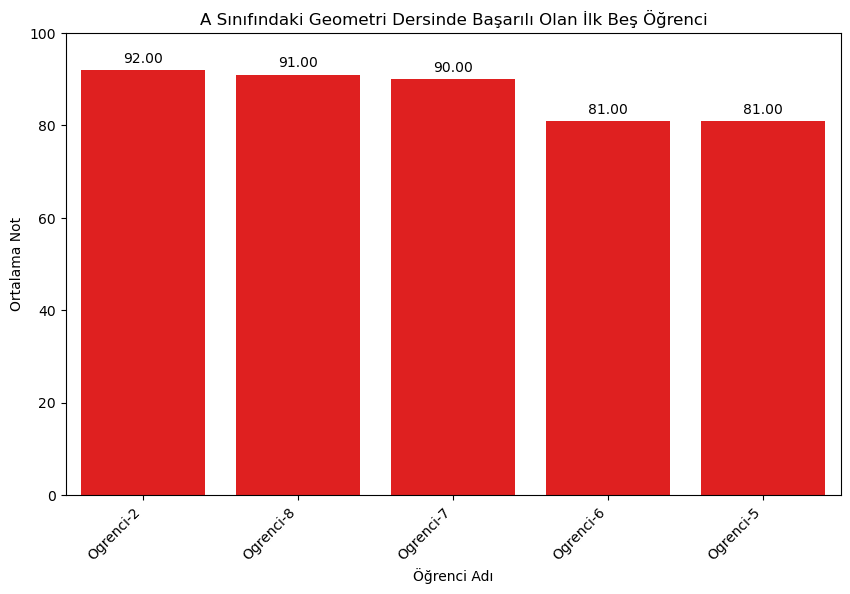

In [20]:


# SQLite veritabanı bağlantısı oluştur
conn = sqlite3.connect('okul_analizi.db')

# SQL sorgusu
sorgu = '''
    SELECT
        Ogrenciler.ogrenci_adi,
        AVG(DersNotlari.not_degeri) AS ortalama_not
    FROM
        DersNotlari
        JOIN Ogrenciler ON DersNotlari.ogrenci_id = Ogrenciler.ogrenci_id
        JOIN Siniflar ON Ogrenciler.sinif_id = Siniflar.sinif_id
    WHERE
        Siniflar.sinif_adi = 'A' AND
        DersNotlari.ders_adi = 'Geometri'
    GROUP BY
        Ogrenciler.ogrenci_adi
    ORDER BY
        ortalama_not DESC
    LIMIT 5;
'''

# Sonuçları bir veri çerçevesine yükle
veri_cercevesi = pd.read_sql_query(sorgu, conn)

# Grafiği oluştur
plt.figure(figsize=(10, 6))
sns.barplot(x=veri_cercevesi['ogrenci_adi'], y=veri_cercevesi['ortalama_not'], color='red')
plt.title('A Sınıfındaki Geometri Dersinde Başarılı Olan İlk Beş Öğrenci')
plt.xlabel('Öğrenci Adı')
plt.ylabel('Ortalama Not')
plt.ylim(0, 100)

# Notları grafiğe ekleyerek daha anlaşılır hale getir
for i, v in enumerate(veri_cercevesi['ortalama_not']):
    plt.text(i, v + 1, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Grafiği göster
plt.xticks(rotation=45, ha='right')
plt.show()

# Veritabanı bağlantısını kapat
conn.close()


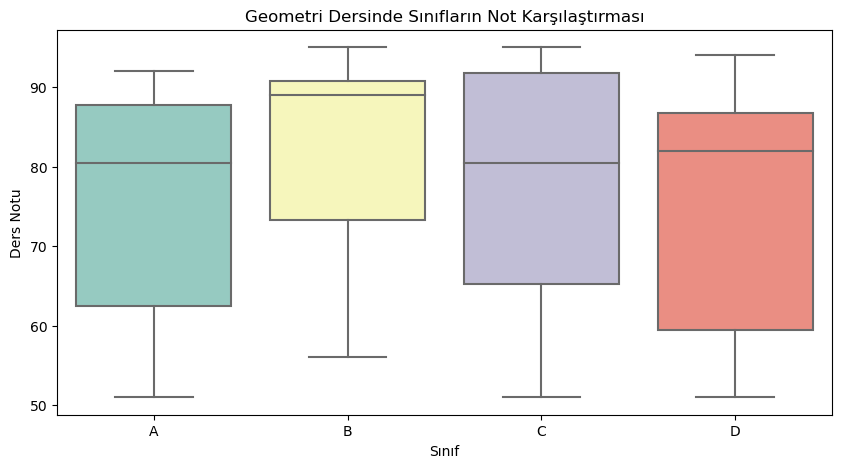

In [26]:


# SQLite veritabanı bağlantısı oluştur
conn = sqlite3.connect('okul_analizi.db')

# SQL sorgusu
sorgu = '''
    SELECT
        Siniflar.sinif_adi,
        Ogrenciler.ogrenci_adi,
        DersNotlari.not_degeri
    FROM
        DersNotlari
        JOIN Ogrenciler ON DersNotlari.ogrenci_id = Ogrenciler.ogrenci_id
        JOIN Siniflar ON Ogrenciler.sinif_id = Siniflar.sinif_id
    WHERE
        DersNotlari.ders_adi = 'Geometri'
'''

# Sonuçları bir veri çerçevesine yükle
veri_cercevesi = pd.read_sql_query(sorgu, conn)

# Grafiği oluştur
plt.figure(figsize=(10, 5))
sns.boxplot(x='sinif_adi', y='not_degeri', data=veri_cercevesi, palette='Set3')
plt.title('Geometri Dersinde Sınıfların Not Karşılaştırması')
plt.xlabel('Sınıf')
plt.ylabel('Ders Notu')

# Grafiği göster
plt.xticks(rotation=0, ha='center')
plt.show()

# Veritabanı bağlantısını kapat
conn.close()
